<a href="https://colab.research.google.com/github/ColletLisa/ColletLisa/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Specifying the question**  
Using the dataset given from https://ourworldindata.org website,identify the correlation between age and deaths as recorded in the covid 19 

**Metrics of success**   
This project will be considered successful when we shall be able to 
identify and visualize the correlation between deaths and age. 

**Understanding the context**


*   Covid-19 was first identified in Wuhan, the capital of China's Hubei province.


*   People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective. 
*   The virus showed human to human transmission whose rate escalated in mid January 2020,which later spread worldwide.
*  Some people died after contracting the virus while others recovered without much strain.The deaths were observed more in specific people such as the old population.






**Relevance of the data**


*   The data contains daily records of the total number of deaths,new cases recorded,population,location,continent etc.




**Data source**

https://ourworldindata.org/

**Reading the data**

In [ ]:
#importing of relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading the dataset using pandas.The data has been downloaded
data=pd.read_csv('/content/drive/MyDrive/PROJECT DATASET/covid19_worlddata.csv')


**Checking our data**

*   This involves previewing the first and last 5 rows of or data,checking the number of records.
*



In [ ]:
#checking the first 5 rows
data.head()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,0.125,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.125,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.125,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.125,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,0.125,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
#checking the last 5 rows
data.tail()

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
216811,Africa,Zimbabwe,9/11/2022,256870.0,0.0,15.286,5596.0,0.0,0.0,16060.876,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
216812,Africa,Zimbabwe,9/12/2022,256888.0,18.0,17.000,5596.0,0.0,0.0,16062.001,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
216813,Africa,Zimbabwe,9/13/2022,256904.0,16.0,17.429,5596.0,0.0,0.0,16063.001,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
216814,Africa,Zimbabwe,9/14/2022,256939.0,35.0,16.286,5596.0,0.0,0.0,16065.190,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
216815,Africa,Zimbabwe,9/15/2022,256939.0,0.0,15.000,5596.0,0.0,0.0,16065.190,...,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49


In [ ]:
data.shape

(216816, 61)

**Observation**


*   From the above output,our data has 216816 rows and 61 columns.
NOTE:Some of the columns will be droped as we will not need them in our analysis.




In [ ]:
#checking for the columns in our data
data.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccina

**Observation**


*  The data has a lot of columns which might not be necessary in our research.




In [ ]:
#checking for general information in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216816 entries, 0 to 216815
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   continent                                   204338 non-null  object 
 1   location                                    216816 non-null  object 
 2   date                                        216816 non-null  object 
 3   total_cases                                 207912 non-null  float64
 4   new_cases                                   207672 non-null  float64
 5   new_cases_smoothed                          206480 non-null  float64
 6   total_deaths                                188868 non-null  float64
 7   new_deaths                                  188820 non-null  float64
 8   new_deaths_smoothed                         187640 non-null  float64
 9   total_cases_per_million                     206960 non-null  float64
 

**Observation**


*   Most of our varibbles are float(numerical data).Only 4 of the variables are categorical(string). It is therefore safe for us to say that our variables are in their correct data types.




In [ ]:
#checking for descriptive statistical information of our continuous data
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,2.079120e+05,2.076720e+05,2.064800e+05,1.888680e+05,188820.000000,187640.000000,206960.000000,206720.000000,205533.000000,187929.000000,...,177266.000000,177467.000000,115770.000000,177735.000000,186804.000000,134591.000000,132748.000000,87357.000000,158078.000000,202550.000000
mean,4.137317e+06,1.254565e+04,1.257892e+04,7.184467e+04,143.426893,144.150640,55324.319588,190.189953,190.569417,666.496692,...,5.559468,19566.631623,13.626532,261.078287,8.384753,10.671708,32.806294,50.850004,3.084695,73.629860
std,2.595932e+07,8.656681e+04,8.463003e+04,3.706375e+05,745.315063,730.773044,99592.136138,981.113760,647.080255,954.008584,...,4.163558,20552.681283,20.029588,119.952208,4.729657,10.620804,13.533344,31.841980,2.550247,7.447488
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,3.865750e+03,0.000000e+00,6.571000e+00,1.080000e+02,0.000000,0.000000,980.340750,0.000000,1.436000,28.177000,...,2.063000,4449.898000,0.600000,170.050000,5.310000,1.900000,21.600000,20.859000,1.300000,69.500000
50%,4.527700e+04,6.000000e+01,9.842900e+01,1.103000e+03,1.000000,1.714000,9350.120500,8.463500,20.114000,197.622000,...,4.209000,12951.839000,2.200000,243.964000,7.200000,6.300000,31.400000,49.839000,2.500000,75.050000
75%,4.896838e+05,9.910000e+02,1.151143e+03,9.389250e+03,15.000000,16.571000,66894.426000,100.686000,137.333000,987.455000,...,8.678000,27936.896000,21.200000,329.942000,10.590000,19.300000,41.300000,82.502000,4.200000,79.070000
max,6.108720e+08,4.081627e+06,3.436128e+06,6.522661e+06,17737.000000,14858.143000,655309.333000,195005.313000,35258.843000,6413.524000,...,18.493000,116935.600000,77.600000,724.417000,30.530000,44.000000,78.100000,100.000000,13.800000,86.750000


This helps in highlighting the minimum and maximum values,mean,standard deviation,and quartile ranges in the continuous variables.

**Data Cleaning**


This is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within the dataset.




In [ ]:
#checking for duplicates
data.duplicated().any()


False

**Observation**
Our dataset has no duplicated values

In [ ]:
#checking for missing values
data.isnull().sum()

continent                      12478
location                           0
date                               0
total_cases                     8904
new_cases                       9144
                               ...  
female_smokers                 82225
male_smokers                   84068
handwashing_facilities        129459
hospital_beds_per_thousand     58738
life_expectancy                14266
Length: 61, dtype: int64

**Observation**
   
*   Due to the nature of the dataset,many columns have null values 
which appears to be natural.We will therefore go ahead and fill the null with zero to avoid blanks in our data.

In [ ]:
#filling null values with zero and checking to see whether the chang has been 
#effected
data.fillna(0).head(2)


,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Asia,Afghanistan,2/24/2020,5.0,5.0,0.0,0.0,0.0,0.0,0.125,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83
1,Asia,Afghanistan,2/25/2020,5.0,0.0,0.0,0.0,0.0,0.0,0.125,...,1.337,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.5,64.83


In [ ]:
#dropping the columns that we won't need for our analysis
data_new=data.drop(columns=['new_deaths','new_deaths_smoothed','new_cases_per_million',
                            'new_cases_smoothed_per_million','total_deaths_per_million',
 'new_deaths_per_million','new_deaths_smoothed_per_million','icu_patients_per_million',
 'weekly_icu_admissions_per_million','weekly_hosp_admissions_per_million','total_tests_per_thousand', 
 'new_tests_per_thousand','tests_units','new_vaccinations_smoothed','new_people_vaccinated_smoothed_per_hundred', 
 'stringency_index'])


We will work with the dataset as it is now even though some of the columns may not be used.

In [ ]:
data_new.head(2)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,reproduction_rate,icu_patients,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,0.125,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,0.125,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [ ]:
#checking for the number of countries in the dataset
data_new.location.nunique()

244

The dataset has 244 countries.

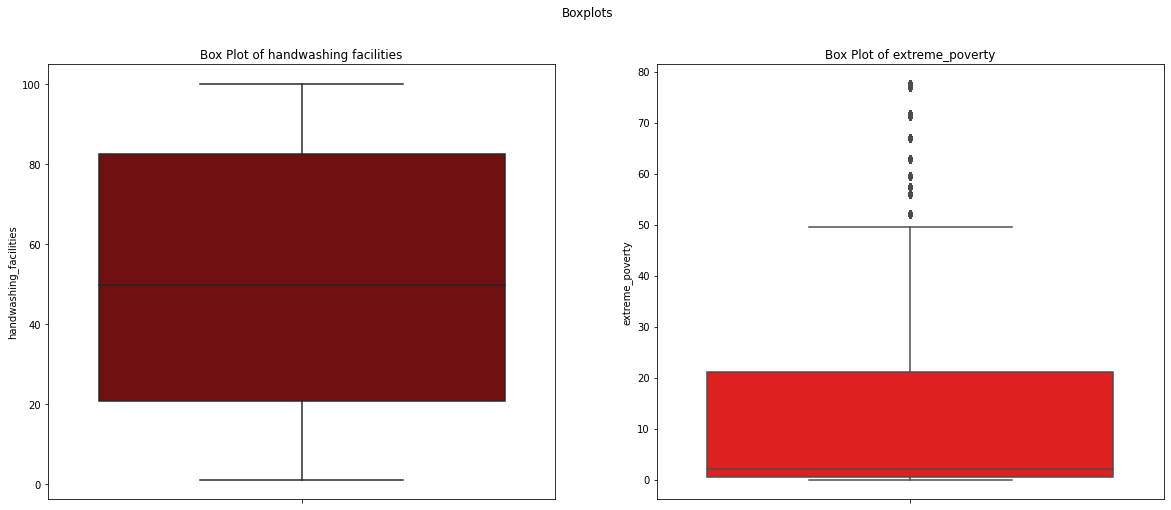

In [62]:
#checking for outliers using box plot
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')

sns.boxplot(data=data_new, y = 'handwashing_facilities', ax=ax[0], color = 'maroon')
ax[0].set_title('Box Plot of handwashing facilities')

sns.boxplot(data=data_new, y = 'extreme_poverty', ax=ax[1], color = 'red')
ax[1].set_title('Box Plot of extreme_poverty')
plt.show()


**Observation**


*   There seems to be outliers in the data but we will work with the data as is because it is natural to the data.




**EXPLORATORY DATA ANALYSIS**


*   **Univarite analysis**



This refers to the analysis of one variable






In [ ]:
#Check the frequency table of 'continent' variable
data_new.continent.value_counts()


Africa           50088
Europe           46906
Asia             46550
North America    33346
Oceania          15409
South America    12039
Name: continent, dtype: int64

**Observations**


*   Africa has the highest number of entries while South Africa has the lowest.The dataset also has records for 6 continents.





In [ ]:
#Check the frequency table of 'continent' variable
data_new.location.value_counts()


Argentina          989
Mexico             989
Thailand           986
Taiwan             974
Macao              968
                  ... 
Niue               408
Palau              390
Turkmenistan       372
Northern Cyprus    317
Western Sahara       1
Name: location, Length: 244, dtype: int64

**Observation**


*   The data set has 244 countries with Western Sahara having the lowest value count and Argentina with the highest.





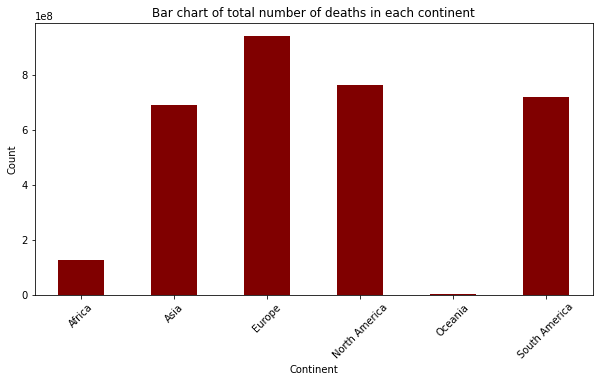

In [ ]:
#visualizing the total number of deaths in each continent using a bar chart
data_new.groupby(['continent'])['total_deaths'].sum().plot.bar(rot =0,figsize=(10,5),color='Maroon')
plt.xlabel("Continent")
plt.ylabel("Count")
plt.title("Bar chart of total number of deaths in each continent")
plt.xticks(rotation = 45)
plt.show()

**Oservation**


*   From the above Bar chart, Europe lost the highest number of people to Covid 19 while Oceania and Africa had the least numbers.




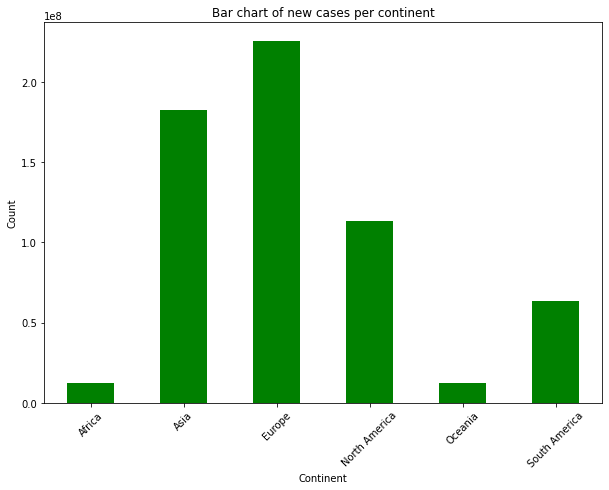

In [63]:
#visualizing the total new cases in each continent using a bar chart
data_new.groupby(['continent'])['new_cases'].sum().plot.bar(rot =0,figsize=(10,7),color='Green')
plt.xlabel("Continent")
plt.ylabel("Count")
plt.title("Bar chart of new cases per continent")
plt.xticks(rotation = 45)
plt.show()

**Observation**


*   Europe and Asia have the highest number of new cases per day.




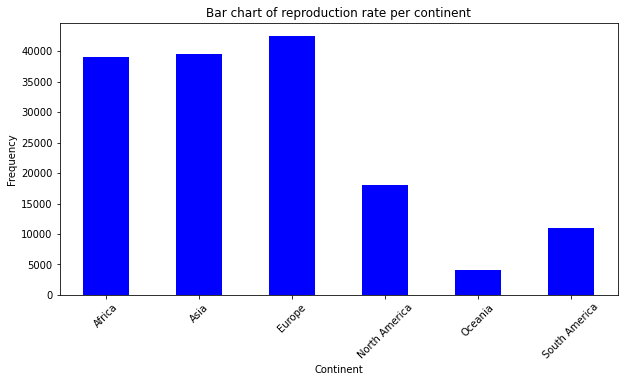

In [ ]:
data_new.groupby(['continent'])['reproduction_rate'].sum().plot.bar(rot =0,figsize=(10,5),color='blue')
plt.xlabel("Continent")
plt.ylabel("Frequency")
plt.title("Bar chart of reproduction rate per continent")
plt.xticks(rotation = 45)
plt.show()


**Observation**


*  From the data,Europe,Asia and Africa maintained a high reproduction rate despite the pandemic.


*   Oceania had a low reproduction rate







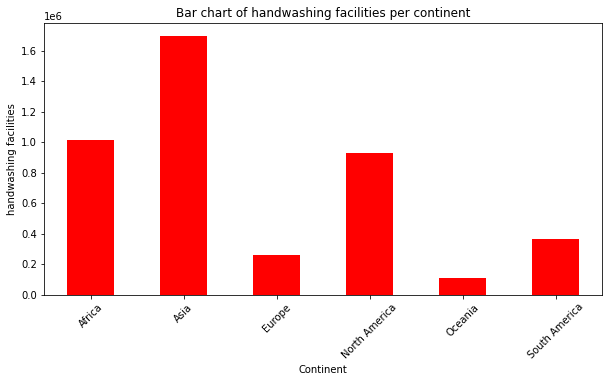

In [ ]:
#visualizing the total new cases in each continent using a bar chart
data_new.groupby(['continent'])['handwashing_facilities'].sum().plot.bar(rot =0,figsize=(10,5),color='red')
plt.xlabel("Continent")
plt.ylabel("handwashing facilities")
plt.title("Bar chart of handwashing facilities per continent")
plt.xticks(rotation = 45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


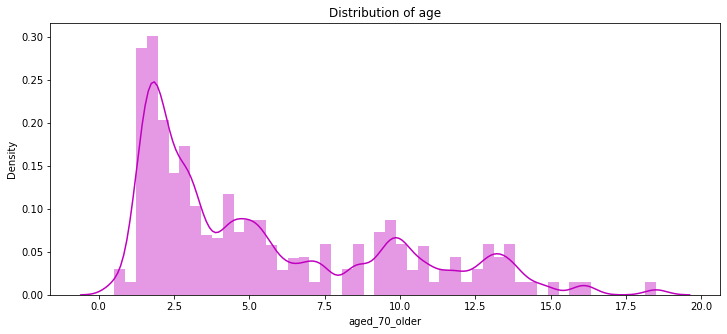

In [54]:
#plotting distribution plot of aged 70 and older
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data_new["aged_70_older"], color = 'm')
plt.show()

The distribution shows a positive skeweness in the age distribution because the tail is longer on the right side.This indicates that the mean is greater than the median.

**Observation**


*   Asia had the highest number of handwashing facilities while Oceania had the lowest




**Bivariate Anaysis**


*   This involves the analysis of any concurrent relation between  two-variable. 



In [42]:
# Determining the correlation coeffient between the total deaths and aged 70 and above
# We'll use the pearson coefficient
pearson_coeff = data_new["total_deaths"].corr(data_new['aged_70_older'], method="pearson")
print(pearson_coeff)

0.02624028853345184


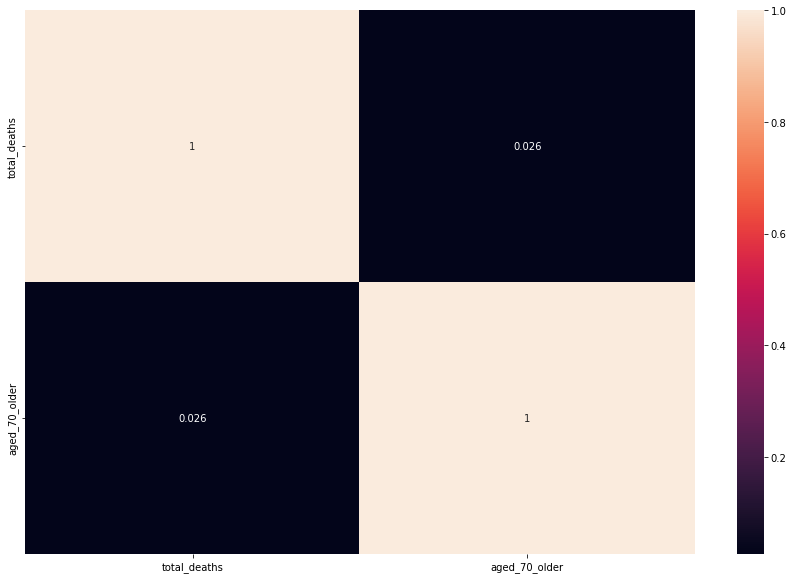

In [45]:
# Visualizing the correlation using a heat map
plt.figure(figsize=(15,10))
sns.heatmap(data_new[["total_deaths", "aged_70_older"]].corr(), annot=True)


**Observation**

*  The heatmap shows a weak positive correlation between the total deaths and aged 70 and above.







In [41]:
data_new.head(2)

,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,total_cases_per_million,reproduction_rate,icu_patients,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,0.125,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,0.125,NaN,NaN,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [49]:
pearson_coeff = data_new["total_deaths"].corr(data_new['handwashing_facilities'], method="pearson")
print(pearson_coeff)

0.04260495788637144


There is a weak positive correlation between total deaths and the handwashing facilities